In [1]:
import pandas as pd
data = pd.read_csv('D:/Work/Jupyter/NLP/Classwork/Consumer_Complaints.csv')

In [2]:
data = data[['Product', 'Consumer complaint narrative']]
data = data.dropna()
data['Product'] = data['Product'].str.lower()
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].str.lower()

In [3]:
def renaming(x):
    if x =='credit reporting':
        x = 'credit reporting,credit repair services, or other personal consumer reports'
    elif x == 'credit card':
        x = 'credit card or prepaid card'
    elif x == 'virtual currency':
        x = 'money transfer, virtual currency, or money service'
    elif x == 'prepaid card':
        x = 'credit card or prepaid card'
    elif x == 'money transfers':
        x = 'money transfer, virtual currency, or money service'
    elif x == 'payday loan':
        x = 'payday loan, title loan, or personal loan'
    elif x == 'checking or savings account':
        x = 'bank account or service'
    return x

def rerenaming(x):
    if x=='student loan' or x=='consumer loan' or x=='payday loan, title loan, or personal loan' or x=='vehicle loan or lease':
        x = 'loans'
    elif x=='money transfer, virtual currency, or money service':
        x = 'other financial service'
    return x

In [4]:
data["Product"] = data["Product"].apply(renaming)
data["Product"] = data["Product"].apply(rerenaming)
data10k = data.groupby('Product').filter(lambda x : len(x)>10000)

In [5]:
X = data10k['Consumer complaint narrative'][:600]
y = data10k['Product'][:600]

In [6]:
from sklearn.preprocessing import LabelEncoder as LE
le = LE()
y = pd.Series(le.fit_transform(y))

In [7]:
from nltk.tokenize import word_tokenize as wtk
from nltk.stem import WordNetLemmatizer as wnl
lem = wnl()
def lemon(narr):
    words = wtk(narr)
    words = [lem.lemmatize(x) for x in words]
    narr = ' '.join([x for x in words])
    return narr

In [8]:
X = X.apply(lemon)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer as TV
tv = TV(stop_words='english')
X = tv.fit_transform(X)
X = pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4830,4831,4832,4833,4834,4835,4836,4837,4838,4839
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.151062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.model_selection import train_test_split as tts
Xtrain, Xtest, ytrain, ytest = tts(X, y, test_size = 0.5, random_state = 16)

In [11]:
from sklearn.naive_bayes import MultinomialNB as MNB
mnb = MNB()
mnb.fit(Xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
ypred_tr = mnb.predict(Xtrain)
from sklearn.metrics import accuracy_score as ac, confusion_matrix as cm
import seaborn as sb
import matplotlib.pyplot as pp
print("ACCURACY SCORE ON TRAINING SET = {}".format(ac(ytrain, ypred_tr).round(4)))
print("\nCONFUSION MATRIX HEATMAP:")
sb.heatmap(cm(ytrain, ypred_tr), annot = True)
pp.show()
print("\nVALUE COUNTS:\n")
print(ytrain.value_counts())

ACCURACY SCORE ON TRAINING SET = 0.7333

CONFUSION MATRIX HEATMAP:


<Figure size 640x480 with 2 Axes>


VALUE COUNTS:

3    82
2    59
5    56
4    40
1    33
0    30
dtype: int64


ACCURACY SCORE ON TEST SET = 0.46

CONFUSION MATRIX HEATMAP:


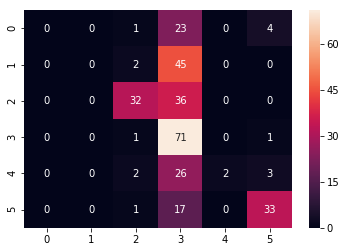


VALUE COUNTS:

3    73
2    68
5    51
1    47
4    33
0    28
dtype: int64


In [13]:
ypred = mnb.predict(Xtest)
print("ACCURACY SCORE ON TEST SET = {}".format(ac(ytest, ypred).round(4)))
print("\nCONFUSION MATRIX HEATMAP:")
sb.heatmap(cm(ytest, ypred), annot = True)
pp.show()
print("\nVALUE COUNTS:\n")
print(ytest.value_counts())